In [1]:
library('ggplot2')
library('plyr')
library('tidyr')
library('parallel')
library('lme4')
library("scales")
source('freq-vs-info-content_helper.R')
source('ss_analysis_new.R')
source('config.R')

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘reshape’


The following object is masked from ‘package:Matrix’:

    expand


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following objects are masked from ‘package:plyr’:

    rename, round_any


Loading required package: fit.models

Registered S3 methods overwritten by 'robust':
  method              from      
  plot.covfm          fit.models
  print.covfm         fit.models
  summary.covfm       fit.models
  print.summary.covfm fit.models

rlm is already registered in the fit.models registry

covfm is already registered in the fit.models registry


Attaching package: ‘robust’


The following objects are masked from ‘package:fit.models’:

    ddPlot.covfm, distancePlot.covfm, ellipsesPlot.covfm,
    screePlot.covfm




In [2]:
# Equivalent to Cross-Linguistic Correlations in Cross-Linguistic PIC (1T, Books 2012, OPUS, BNC)

In [3]:
languages = c('ENGLISH',"SPANISH",'FRENCH', 'DUTCH', 'GERMAN','SWEDISH','CZECH','POLISH','ROMANIAN','ITALIAN','PORTUGUESE')
withoutEndMarker = lapply(languages, function(language){getScoresForLanguage(
   paths[['current_unfiltered']], 'Google1T',0,language, endMarker=T,  corMethod='spearman', filename='meanSurprisal.csv', opusFilter=T)})

[1] "Filtering..."
[1] "filtered number in ENGLISH: 45907"
[1] "original number in ENGLISH: 45907"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in SPANISH: 44965"
[1] "original number in SPANISH: 44965"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in FRENCH: 44332"
[1] "original number in FRENCH: 44332"
[1] "Limiting analysis"
[1] "Getting correlatio

In [4]:
g1t_corpusCounts = do.call('rbind',lapply(withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
g1t_corpusCounts

language,numTokens,numTokens_pretty,analysisCount
<chr>,<dbl>,<chr>,<int>
English,297026388321,"297,026,388,321",25000
Spanish,36521851135,"36,521,851,135",25000
French,35453556858,"35,453,556,858",25000
Dutch,29411789818,"29,411,789,818",25000
German,21996128613,"21,996,128,613",25000
Swedish,26185173863,"26,185,173,863",25000
Czech,21264025396,"21,264,025,396",25000
Polish,22201386981,"22,201,386,981",25000
Romanian,30398020500,"30,398,020,500",25000


In [5]:
nem = do.call('rbind', lapply(withoutEndMarker, function(x){x$score}))

In [6]:
nem = do.call('rbind', lapply(withoutEndMarker, function(x){x$score}))
nem$xv = expandColNames(nem$xv)
nem$yv = expandColNames(nem$yv)
#Better word-level metric names


nem = merge(nem,g1t_corpusCounts, by='language')
nem$language = factor(nem$language)
nem$languageCount = sapply(1:length(nem$language), function(x){paste0(nem$language[x], ' (', round(nem$numTokens[x] / 1000000000,0),'b)' )})
nem$yv_xv = paste(nem$yv, nem$xv, sep='-')

In [7]:
books2012_languages = c('eng-all',"spa-all",'fre-all','ger-all','rus-all','heb-all','ita-all')
books2012_withoutEndMarker = lapply(books2012_languages, function(language){
    getScoresForLanguage(paths[['current_unfiltered']],'GoogleBooks2012',0, language, endMarker=T,  corMethod='spearman', filename='meanSurprisal.csv', contextLimit=0, opusFilter=T)})
names(books2012_withoutEndMarker) = books2012_languages

[1] "Filtering..."
[1] "filtered number in eng-all: 48726"
[1] "original number in eng-all: 48726"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in spa-all: 47339"
[1] "original number in spa-all: 47339"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in fre-all: 45939"
[1] "original number in fre-all: 45939"
[1] "Limiting analysis"
[1] "Getting correlat

In [8]:
gb12_corpusCounts = do.call('rbind',lapply(books2012_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language = language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
gb12_corpusCounts$language = sapply(gb12_corpusCounts$language, function(x){
    gb12_langRemapper[[x]]
})
gb12_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
,<chr>,<dbl>,<chr>,<int>
eng-all,English,227372896952,"227,372,896,952",25000
spa-all,Spanish,38662101281,"38,662,101,281",25000
fre-all,French,47083664783,"47,083,664,783",25000
ger-all,German,17668420097,"17,668,420,097",25000
rus-all,Russian,12260979802,"12,260,979,802",25000
heb-all,Hebrew,2964708858,"2,964,708,858",25000
ita-all,Italian,13858326706,"13,858,326,706",25000


In [9]:
books2012.nem = do.call('rbind', lapply(books2012_withoutEndMarker, function(x){x$score}))
books2012.nem$xv = expandColNames(books2012.nem$xv)
books2012.nem$yv = expandColNames(books2012.nem$yv)
#Better word-level metric names

books2012.nem$language = sapply(books2012.nem$language, function(x){
    gb12_langRemapper[[x]]
})

books2012.nem = merge(books2012.nem,gb12_corpusCounts, by='language')
books2012.nem$language = factor(books2012.nem$language)
books2012.nem$languageCount = sapply(1:length(books2012.nem$language), function(x){paste0(books2012.nem$language[x], ' (', round(books2012.nem$numTokens[x] / 1000000000,0),'b)' )})
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')

In [10]:
opus_languages = c('en','ru','he','de','fr','es','cs','pt', 'pl','ro','sv','it','nl')
opus_withoutEndMarker = lapply(1:length(opus_languages), function(i){
    getScoresForLanguage(paths[['current_unfiltered']],'OPUS',0,opus_languages[i], endMarker=T,  corMethod='spearman', filename='meanSurprisal.csv', opusFilter=T)})
names(opus_withoutEndMarker) = opus_languages

[1] "Filtering..."
[1] "filtered number in en: 50000"
[1] "original number in en: 50000"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in ru: 50000"
[1] "original number in ru: 50000"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "Filtering..."
[1] "filtered number in he: 50000"
[1] "original number in he: 50000"
[1] "Limiting analysis"
[1] "Getting correlations"
[1] "Missing something!"

In [11]:
opus_corpusCounts = do.call('rbind',lapply(opus_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
opus_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
,<chr>,<dbl>,<chr>,<int>
en,English,789473247,"789,473,247",25000
ru,Russian,54263323,"54,263,323",25000
he,Hebrew,81708912,"81,708,912",25000
de,German,39534389,"39,534,389",25000
fr,French,225001588,"225,001,588",25000
es,Spanish,247980651,"247,980,651",25000
cs,Czech,121042582,"121,042,582",25000
pt,Portuguese,133179423,"133,179,423",25000
pl,Polish,86015980,"86,015,980",25000


In [12]:
opus.nem = do.call('rbind', lapply(opus_withoutEndMarker, function(x){x$score}))
opus.nem$xv = expandColNames(opus.nem$xv)
opus.nem$yv = expandColNames(opus.nem$yv)
#Better word-level metric names
opus.nem = merge(opus.nem,opus_corpusCounts, by='language')
opus.nem$language = as.factor(sapply(opus.nem$language, simpleCap))
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')
opus.nem$languageCount = sapply(1:length(opus.nem$language), function(x){paste0(opus.nem$language[x], ' (', round(opus.nem$numTokens[x] / 1000000,0),'m)' )})

In [13]:
opus_datasets = do.call('rbind',lapply(opus_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
opus_datasets$dataset = 'OPUS'                      
                        
gb12_datasets = do.call('rbind',lapply(books2012_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
gb12_datasets$dataset = 'GB12'

g1t_datasets = do.call('rbind',lapply(withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
g1t_datasets$dataset = 'G1T'

In [14]:
combined_datasets = rbind.fill(opus_datasets, gb12_datasets, g1t_datasets)
combined_datasets$dataset_language = paste0(combined_datasets$dataset, ': ', combined_datasets$language)

nem$languageLabel = paste('1T:', nem$languageCount)
books2012.nem$languageLabel = paste('GB12:', books2012.nem$languageCount)
opus.nem$languageLabel = paste('OPUS:', opus.nem$languageCount)
nem$dataset = '1T'
books2012.nem$dataset = 'GB12'
opus.nem$dataset = 'OPUS'
nem_combined = rbind.fill(nem, books2012.nem, opus.nem)


In [15]:
subset(nem_combined, dataset == '1T')

,language,yv,xv,resid_var,meanBootstrap,singleCor,lower,upper,pvalue,direction,corMethod,residualize,endMarker,numTokens,numTokens_pretty,analysisCount,languageCount,yv_xv,languageLabel,dataset
,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,Czech,Difference: Unigram Surprisal - Trigram Surprisal,Number of Characters,NA,0.045654649,NA,0.025298031,0.0672275834,0,higher,spearman,FALSE,TRUE,21264025396,"21,264,025,396",25000,Czech (21b),Difference: Unigram Surprisal - Trigram Surprisal-Number of Characters,1T: Czech (21b),1T
2,Czech,Unigram Surprisal,Number of Characters,NA,0.133949214,0.134041077,0.117629070,0.1497624323,NA,NA,spearman,FALSE,TRUE,21264025396,"21,264,025,396",25000,Czech (21b),Unigram Surprisal-Number of Characters,1T: Czech (21b),1T
3,Czech,Trigram Surprisal,Number of Characters,NA,0.088294566,0.088349787,0.071193339,0.1036633431,NA,NA,spearman,FALSE,TRUE,21264025396,"21,264,025,396",25000,Czech (21b),Trigram Surprisal-Number of Characters,1T: Czech (21b),1T
4,Czech,Difference: Unigram Surprisal - Trigram Surprisal,Number of Characters,unigramSurprisal - trigramSurprisal,0.051950931,NA,0.027432706,0.0758589427,0,higher,spearman,TRUE,TRUE,21264025396,"21,264,025,396",25000,Czech (21b),Difference: Unigram Surprisal - Trigram Surprisal-Number of Characters,1T: Czech (21b),1T
5,Czech,Unigram Surprisal,Number of Characters,trigramSurprisal,0.115445796,0.115135739,0.100145720,0.1316531687,NA,NA,spearman,TRUE,TRUE,21264025396,"21,264,025,396",25000,Czech (21b),Unigram Surprisal-Number of Characters,1T: Czech (21b),1T
6,Czech,Trigram Surprisal,Number of Characters,unigramSurprisal,0.063494865,0.063478378,0.047384067,0.0791424682,NA,NA,spearman,TRUE,TRUE,21264025396,"21,264,025,396",25000,Czech (21b),Trigram Surprisal-Number of Characters,1T: Czech (21b),1T
7,Dutch,Difference: Unigram Surprisal - Trigram Surprisal,Number of Characters,NA,-0.220765899,NA,-0.242943926,-0.1983362638,0,lower,spearman,FALSE,TRUE,29411789818,"29,411,789,818",25000,Dutch (29b),Difference: Unigram Surprisal - Trigram Surprisal-Number of Characters,1T: Dutch (29b),1T
8,Dutch,Unigram Surprisal,Number of Characters,NA,0.072478234,0.072676781,0.056131137,0.0889016239,NA,NA,spearman,FALSE,TRUE,29411789818,"29,411,789,818",25000,Dutch (29b),Unigram Surprisal-Number of Characters,1T: Dutch (29b),1T
9,Dutch,Trigram Surprisal,Number of Characters,NA,0.293244133,0.293217986,0.276928386,0.3091617252,NA,NA,spearman,FALSE,TRUE,29411789818,"29,411,789,818",25000,Dutch (29b),Trigram Surprisal-Number of Characters,1T: Dutch (29b),1T


Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Ignoring unknown aesthetics: fill”


png 
  2

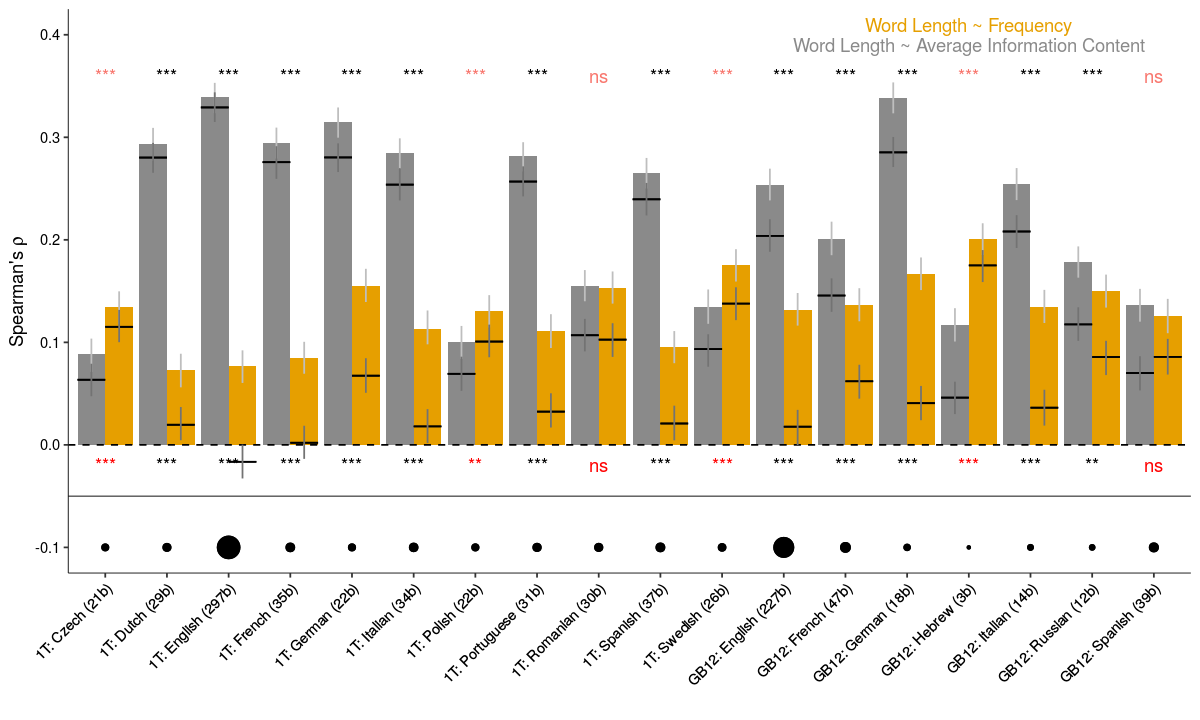

In [16]:
xv_list = c("Number of Characters")
yv_list = c("Unigram Surprisal",'Trigram Surprisal')
col_yellow = "#E69F00" # trigram ~ nchar
col_gray = "#8a8a8a" # trigram ~ ss

dodge <- position_dodge(width=0.9)
correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & !residualize & dataset
!= "OPUS")
partial_correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & 
residualize & dataset != "OPUS")
p_values = subset(nem_combined, xv %in% xv_list & yv == "Difference: Unigram Surprisal - Trigram Surprisal")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)
p_values$direction[p_values$sig =='ns'] = 'higher' # makes ns red, b/c inconsistent with P11

crosslinguistic_predict_len = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=yv),  stat='identity', position='dodge'
)   + scale_fill_manual( values=c(col_gray, col_yellow)
) + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), 
linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.1, size=numTokens)
) + scale_size_area(
) + geom_hline(aes(yintercept = -.05), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray'
) + geom_errorbar(data = subset(partial_correlations, dataset != 'OPUS'), aes(x=languageLabel,
 ymin=singleCor, ymax=singleCor, fill=yv), position='dodge') +  geom_linerange(data=subset(
partial_correlations, dataset != 'OPUS'), aes(
 x=languageLabel, ymin=lower, ymax=upper, fill=yv), position=dodge, colour='grey45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize & dataset
    != "OPUS"), aes(x=languageLabel, y=.36, label=sig)                                                                                            
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize & dataset 
    !="OPUS"), aes(x=languageLabel, y=.36, label=sig, colour='red')
) + geom_text(data=subset(p_values, direction == 'lower' & residualize & dataset 
    != "OPUS"), aes(x=languageLabel, y=-.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & residualize & dataset
    != "OPUS"), aes(x=languageLabel, y=-.02, label=sig), colour='red') + annotate("text",
    x = 'GB12: Hebrew (3b)', y = .41, 
    label = "Word Length ~ Frequency", color=col_yellow) + annotate("text", 
    x = 'GB12: Hebrew (3b)', y = .39, 
    label = "Word Length ~ Average Information Content", color=col_gray
) + coord_cartesian(ylim = c(-.1, .4)) 

pdf('pdfs/crosslinguistic-unigramTrigramLength_noFilter.pdf', width=10, height=5)
print(crosslinguistic_predict_len)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_predict_len)

In [17]:
# Google 1T Frequencies vs. Other Datasets

In [18]:
eng_g1t_freq = withoutEndMarker[[1]]$df[,c('word','frequency')]
names(eng_g1t_freq) = c('word','g1t_freq')
eng_gb12_freq = books2012_withoutEndMarker[[1]]$df[,c('word','frequency')]
names(eng_gb12_freq) = c('word','gb12_freq')
eng_comparison = merge(eng_g1t_freq, eng_gb12_freq, all=T)
eng_comparison[is.na(eng_comparison)] = 0

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


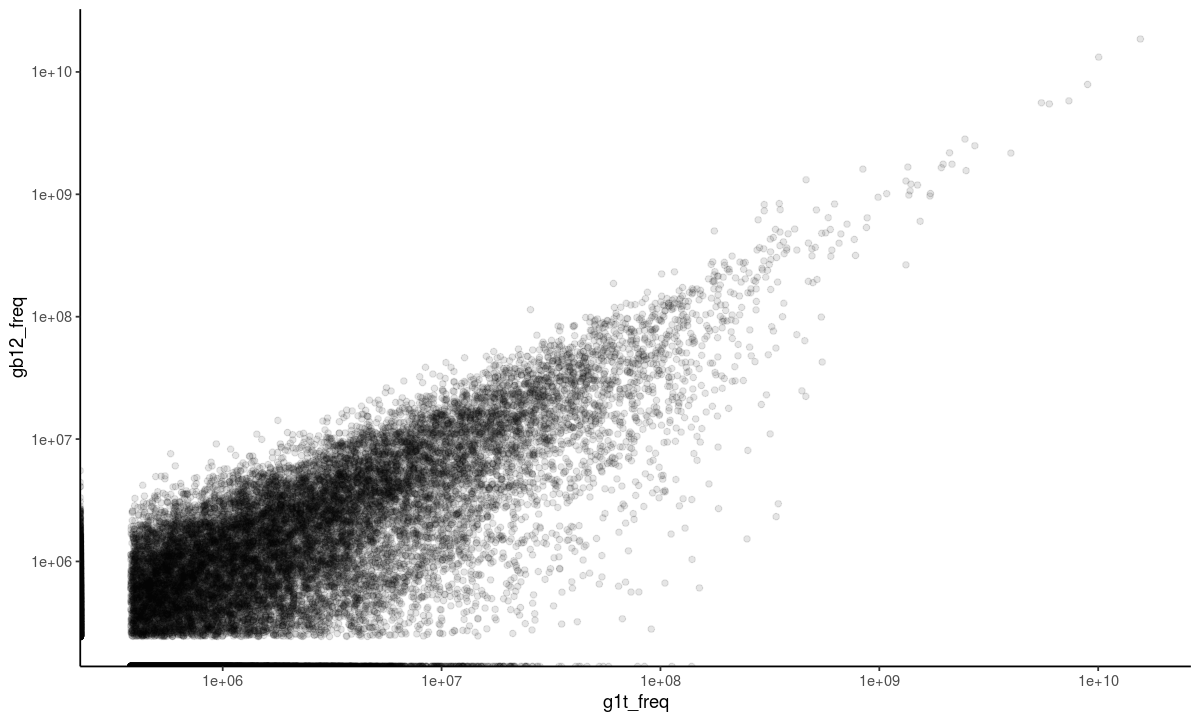

In [19]:
ggplot(eng_comparison) + geom_point(aes(x=g1t_freq, y=gb12_freq), alpha =.1) + theme_classic(
) + scale_y_log10() + scale_x_log10() 

In [20]:
subset(eng_comparison, g1t_freq == 0 & gb12_freq > 0)

,word,g1t_freq,gb12_freq
,<fct>,<dbl>,<dbl>
16,™,0,277023
23,■,0,1952689
194,1640,0,255401
197,1660,0,302225
200,1688,0,343730
214,1760,0,304023
215,1763,0,367818
216,1765,0,274120
217,1769,0,247932


In [21]:
subset(eng_comparison, g1t_freq > 0 & gb12_freq == 0)

,word,g1t_freq,gb12_freq
,<fct>,<dbl>,<dbl>
1,´,15135273,0
2,¨,10425117,0
3,÷,4716861,0
4,×,11038656,0
5,¬,9255249,0
6,¦,13934495,0
8,µ,17103352,0
9,¯,9093300,0
10,­,9471902,0


In [22]:
# why is zombie missing?
# gb12 is missing zombie? or is there something odd going on?
# it is in the unigram list
# word frequency in this corpus is not determining inclusion, it appears. looking ath
# the frequency numbers in 
#~/notebooks/frequency-vs-info-content-data/unfiltered/GoogleBooks2012/eng-all/00_lexicalSurprisal
#  
